In [26]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import netCDF4
import scipy
from scipy import stats
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns

In [27]:
mer_tropical_box = xr.open_dataset('/Users/richard_zhang/Library/CloudStorage/OneDrive-Personal/A_Melbourne-Uni/A_Weather_for_21st_Century_RA_Internship/Local_Remote_Influences_on_Coastal_Rainfall/Data_preparation/ERA5_Tropical_Box/mer_tropical_box.nc')
sst_tropical_box = xr.open_dataset('/Users/richard_zhang/Library/CloudStorage/OneDrive-Personal/A_Melbourne-Uni/A_Weather_for_21st_Century_RA_Internship/Local_Remote_Influences_on_Coastal_Rainfall/Data_preparation/ERA5_Tropical_Box/sst_daily_tropical_band_1998_2022.nc')
mer_tropical_box = -mer_tropical_box

In [28]:
mer_1999 = mer_tropical_box.sel(time=slice('1999-01-01', '1999-12-31'))
sst_1999 = sst_tropical_box.sel(time=slice('1999-01-01', '1999-12-31'))

In [29]:
np_mer = mer_tropical_box['mer'].values
np_sst = sst_tropical_box['sst'].values
np_mer_1999 = mer_1999['mer'].values
np_sst_1999 = sst_1999['sst'].values

In [30]:
sst_tropical_box.sst

<xarray.DataArray 'sst' (time: 9131, latitude: 21, longitude: 81)>
array([[[302.392775, 302.472043, ..., 303.045362, 302.96761 ],
        [302.39136 , 302.455321, ..., 302.9425  , 302.881369],
        ...,
        [300.774265, 300.819128, ..., 300.939016, 300.889859],
        [300.590265, 300.660743, ..., 300.825241, 300.770223]],

       [[302.120615, 302.190234, ..., 302.870558, 302.784166],
        [302.138348, 302.190941, ..., 302.770575, 302.696107],
        ...,
        [300.772143, 300.817057, ..., 300.707577, 300.664179],
        [300.584759, 300.657156, ..., 300.595873, 300.548989]],

       ...,

       [[302.48842 , 302.345459, ..., 302.328295, 302.247232],
        [302.535706, 302.30878 , ..., 302.268549, 302.197494],
        ...,
        [301.13587 , 301.254862, ..., 301.476484, 301.365748],
        [300.907192, 301.008571, ..., 301.384413, 301.260967]],

       [[302.391244, 302.301975, ..., 302.60441 , 302.526049],
        [302.433327, 302.267598, ..., 302.606111, 302.541211],
        ...,
        [301.18826 , 301.321214, ..., 301.607136, 301.397072],
        [300.963736, 301.062513, ..., 301.549491, 301.339278]]])
Coordinates:
  * longitude  (longitude) float32 150.0 150.2 150.5 150.8 ... 169.5 169.8 170.0
  * latitude   (latitude) float32 -15.0 -15.25 -15.5 ... -19.5 -19.75 -20.0
  * time       (time) datetime64[ns] 1998-01-01 1998-01-02 ... 2022-12-31
Attributes:
    units:      K
    long_name:  Sea surface temperature

In [31]:
sst_tropical_box

<xarray.Dataset>
Dimensions:    (longitude: 81, latitude: 21, time: 9131)
Coordinates:
  * longitude  (longitude) float32 150.0 150.2 150.5 150.8 ... 169.5 169.8 170.0
  * latitude   (latitude) float32 -15.0 -15.25 -15.5 ... -19.5 -19.75 -20.0
  * time       (time) datetime64[ns] 1998-01-01 1998-01-02 ... 2022-12-31
Data variables:
    sst        (time, latitude, longitude) float64 302.4 302.5 ... 301.5 301.3

In [32]:
np_mer = np_mer.reshape(9131*81*21)
np_sst = np_sst.reshape(9131*81*21)

In [33]:
np_mer_1999 = np_mer_1999.reshape(365*81*21)
np_sst_1999 = np_sst_1999.reshape(365*81*21)

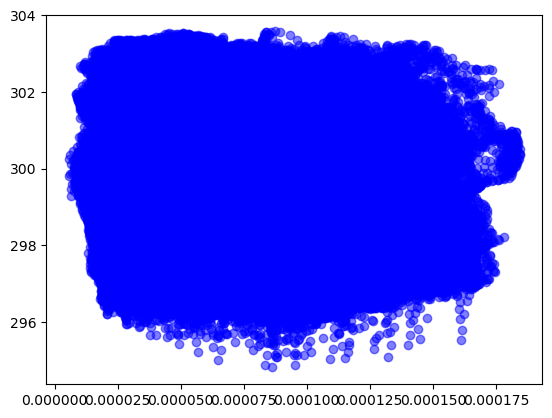

In [34]:
plt.scatter(np_mer_1999, np_sst_1999, c='blue', alpha=0.5)

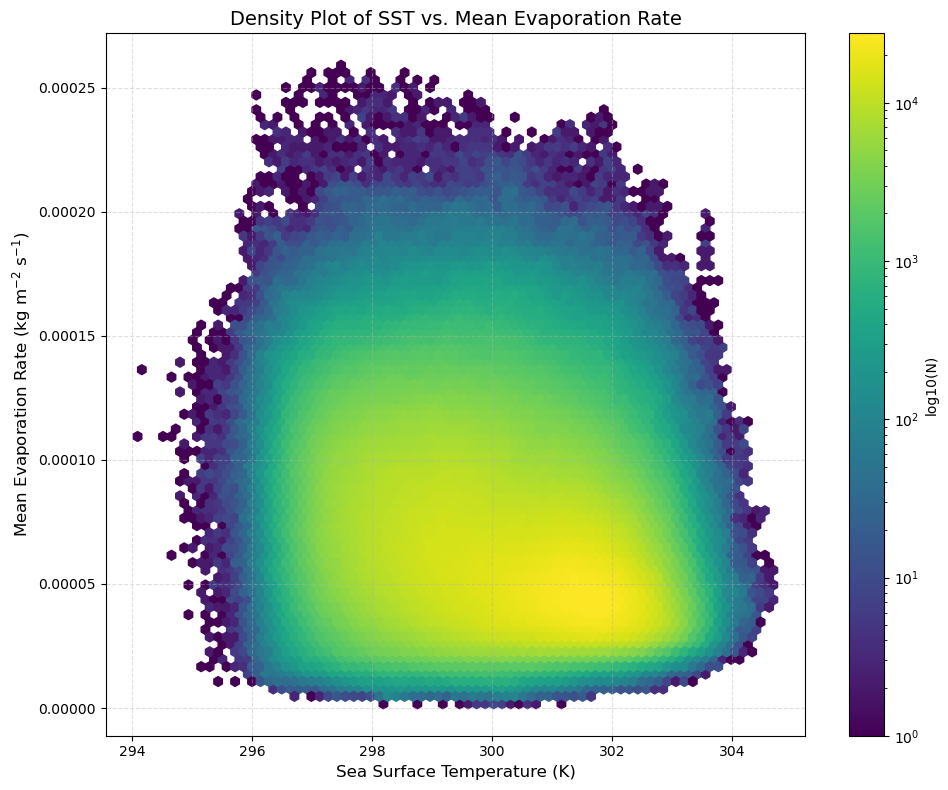

In [35]:
import matplotlib.pyplot as plt
import numpy as np

nan_mask = np.isnan(np_mer) | np.isnan(np_sst)
# Filter out NaN values
sst = np_sst[~nan_mask]
mer = np_mer[~nan_mask]


# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Use hexbin which is much more efficient for large datasets
hb = ax.hexbin(sst, mer, gridsize=75, cmap='viridis', 
               bins='log',  # Use logarithmic binning for better visualization
               mincnt=1)    # Only show cells with at least one point

# Add a colorbar
cbar = plt.colorbar(hb)
cbar.set_label('log10(N)')

# Add labels and title with correct units
ax.set_xlabel('Sea Surface Temperature (K)', fontsize=12)
ax.set_ylabel('Mean Evaporation Rate (kg m$^{-2}$ s$^{-1}$)', fontsize=12)
ax.set_title('Density Plot of SST vs. Mean Evaporation Rate', fontsize=14)

# Add grid for better readability
ax.grid(True, linestyle='--', alpha=0.4)

# Improve layout
plt.tight_layout()

# Save the figure
plt.savefig('sst_mer_density_plot.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

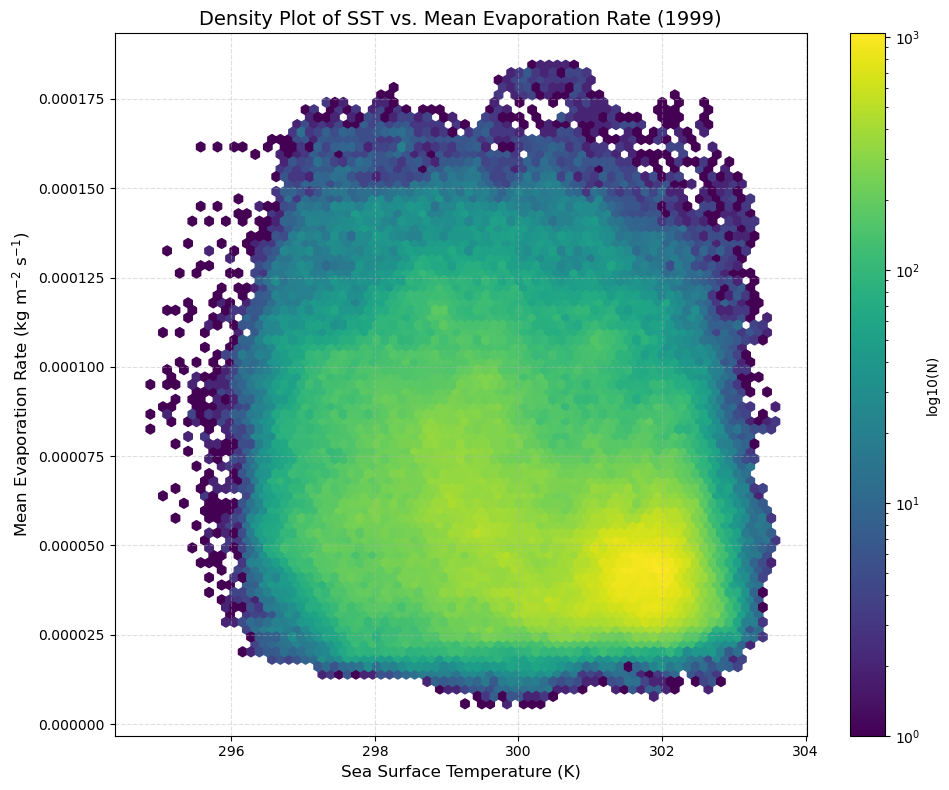

In [36]:
import matplotlib.pyplot as plt
import numpy as np

nan_mask = np.isnan(np_sst_1999) | np.isnan(np_sst_1999)
# Filter out NaN values
sst = np_sst_1999[~nan_mask]
mer = np_mer_1999[~nan_mask]


# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Use hexbin which is much more efficient for large datasets
hb = ax.hexbin(sst, mer, gridsize=75, cmap='viridis', 
               bins='log',  # Use logarithmic binning for better visualization
               mincnt=1)    # Only show cells with at least one point

# Add a colorbar
cbar = plt.colorbar(hb)
cbar.set_label('log10(N)')

# Add labels and title with correct units
ax.set_xlabel('Sea Surface Temperature (K)', fontsize=12)
ax.set_ylabel('Mean Evaporation Rate (kg m$^{-2}$ s$^{-1}$)', fontsize=12)
ax.set_title('Density Plot of SST vs. Mean Evaporation Rate (1999)', fontsize=14)

# Add grid for better readability
ax.grid(True, linestyle='--', alpha=0.4)

# Improve layout
plt.tight_layout()

# Save the figure
plt.savefig('sst_mer_density_plot.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()